<a href="https://colab.research.google.com/github/Legodark/Learning-Data-Science/blob/import_colab/colab_notebooks/Modelos/Proyecto_ML_Mercedes_2_Mano_Precio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto ML | Mercedes Benz - Predicción de precios 2ª mano

## Caso

He elegido trabajar sobre este tema ya que me encantan los coches y me parecio agradable para aprender a crear mi primer modelo de ML, por una parte por que el dataset esta bastante bien estructurado y por otro lado por el motivo que se hizo el dataset (predecir el precio al que un amigo puede vender su coche)

## 1. Obtención de los datos



### Procedencia

| Fuente | Intercambios y mercados |
| --- | --- |
| Recolección | Scraping |
| Dataset | mercedes.csv |
| Dataset procesado | Si |

[100,000 UK Used Car Data set](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes)

## 2. Descripción de los datos

### Comenzamos importando la paqueteria necesaria para trabajar con el Dataset y viendo que contiene este.

In [1]:
# Importación de paquetes

# Tratamiento de datos
import numpy as np
import pandas as pd

# Visualizadores
import matplotlib.pyplot as plt
import seaborn as sns

# Desarrollo del modelo
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
# Cargamos el dataset

file_patch = ('/content/drive/MyDrive/Colab Notebooks/Curso_IA_BIGDATA/IA/MODELOS/Datasets/Coches/merc.csv')

mercedes = pd.read_csv(file_patch)

### Vemos el contenido que tiene el DataFrame



El conjunto de datos limpiado contiene información de modelo, año, precio, transmisión, kilometraje, tipo de combustible, impuesto de circulación, millas por galón (mpg) y tamaño del motor.

| Descripcción | Nombre Columna | Tipo de dato |
| --- | --- | --- |
| Mercedes model | model | Object |
| Año de registro | year | int64 |
| Divisa £ (libras) | price | int64 |
| Caja de cambios | transmission | object |
| Kilometraje (millas) | mileage | int64 |
| Combustible | fulTy | object |
| Impuesto £ (libras) | tax | int64 |
| Consumo (millas) | mpg | float64 |
| Tamaño motor (litros) | engineSize | float64 |

Podemos sacar esta información ejecutando el siguiente código:

In [3]:
# Muestro infomación de los tipos de datos y nulos en el DataFrame

mercedes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


Como se puede ver no hay ningún nulo en nuestro DataFrame, esto nos facilitara el trabajo más adelante.

### Ahora vamos a sacar información que nos puede ser útil para trabajar con el Dataset:

1. Vamos a sacar la cabecera del dataset (5 primeras filas), para ver que información trae el dataset.

2. Sacamos calculos que nos pueden ser de utilidad mas adelante para trabajar con los datos.

3. Vemos cuantos vehículos de cada modelo hay en el Dataset.

In [4]:
# 1. Muestro las primeras filas

mercedes.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
# 2. Mostramos calculos relevantes dentro del Dataset

mercedes.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
# 3. Extraemos una Series de los modelos de mercedes que tenemos en el DataFrame.

mercedes_model = mercedes['model'].value_counts()

mercedes_model

C Class      3747
A Class      2561
E Class      1953
GLC Class     960
GLA Class     847
B Class       591
CL Class      511
GLE Class     461
SL CLASS      260
CLS Class     237
V Class       207
S Class       197
GL Class      121
SLK            95
CLA Class      86
X-CLASS        82
M Class        79
GLS Class      74
GLB Class      19
G Class        15
CLK             7
CLC Class       3
R Class         2
80              1
30              1
20              1
00              1
Name: model, dtype: int64

Como se puede ver tenemos mas cantidad de vehículos en los modelos Class A, Class C, Class E. Por lo que para desarrollar este modelo he dedido crear el siguiente supuesto:

He montado un concesionario de 2 mano muti-marca y he decidido introducir una nueva marca (Mercedes-Benz), donde he adquirido 3 modelos diferentes, un Class A, un Class C, un Class E

In [7]:
# DataFrame para los model A
mercedes_classa = mercedes[mercedes['model'] == 'A Class']

mercedes_classa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2561 entries, 10 to 13109
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         2561 non-null   object 
 1   year          2561 non-null   int64  
 2   price         2561 non-null   int64  
 3   transmission  2561 non-null   object 
 4   mileage       2561 non-null   int64  
 5   fuelType      2561 non-null   object 
 6   tax           2561 non-null   int64  
 7   mpg           2561 non-null   float64
 8   engineSize    2561 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 200.1+ KB


In [8]:
# DataFrame para los model C

mercedes_classc = mercedes[mercedes['model'] == 'C Class']

mercedes_classc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 16 to 13114
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3747 non-null   object 
 1   year          3747 non-null   int64  
 2   price         3747 non-null   int64  
 3   transmission  3747 non-null   object 
 4   mileage       3747 non-null   int64  
 5   fuelType      3747 non-null   object 
 6   tax           3747 non-null   int64  
 7   mpg           3747 non-null   float64
 8   engineSize    3747 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 292.7+ KB


In [9]:
# DataFrame para los model E
mercedes_classe = mercedes[mercedes['model'] == 'E Class']

mercedes_classe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 22 to 13104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1953 non-null   object 
 1   year          1953 non-null   int64  
 2   price         1953 non-null   int64  
 3   transmission  1953 non-null   object 
 4   mileage       1953 non-null   int64  
 5   fuelType      1953 non-null   object 
 6   tax           1953 non-null   int64  
 7   mpg           1953 non-null   float64
 8   engineSize    1953 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 152.6+ KB


In [10]:
# DataFrame para los model A, C, E

mercedes_models_ace = mercedes[(mercedes['model'] == 'A Class') | (mercedes['model'] == 'C Class') | (mercedes['model'] == 'E Class')]

mercedes_models_ace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8261 entries, 10 to 13114
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8261 non-null   object 
 1   year          8261 non-null   int64  
 2   price         8261 non-null   int64  
 3   transmission  8261 non-null   object 
 4   mileage       8261 non-null   int64  
 5   fuelType      8261 non-null   object 
 6   tax           8261 non-null   int64  
 7   mpg           8261 non-null   float64
 8   engineSize    8261 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 645.4+ KB


In [11]:
# Vemos ahora que el nuevo Dataframe contenga solo los modelos A, C y E
mercedes_models_ace['model'].unique()

array(['A Class', 'C Class', 'E Class'], dtype=object)

## 3. Exploración y visualización de los datos

Ahora voy a mostrar varias graficas que representaran en el eje  y  el precio y en el eje  x  el año para los model A Class, C Class y E Class

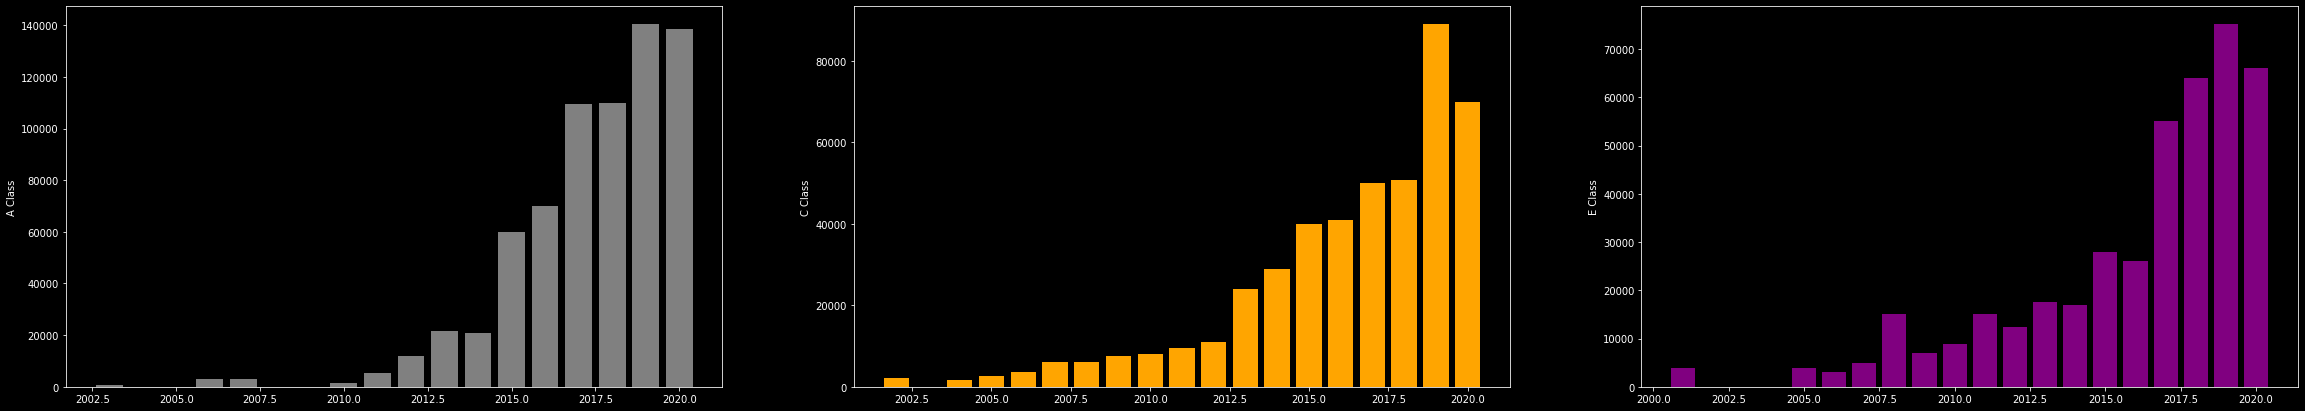

In [12]:
# Le doy color a la tabla y dimensiones a la tabla

plt.style.use('dark_background')
plt.figure(figsize = (40, 7))

# Definimos las 3 gráficas

plt.subplot(131)

plt.ylabel('A Class')
plt.bar('year', 'price', data = mercedes_classa, color = 'grey')

plt.subplot(132)

plt.ylabel('C Class')
plt.bar('year', 'price', data = mercedes_classc, color = 'orange')

plt.subplot(133)

plt.ylabel('E Class')
plt.bar('year', 'price', data = mercedes_classe, color = 'purple')

plt.show()

### Correlaciones

Miramos las correlaciones para los Mercedes A Class, Mercedes C Class Mercedes E Class y entre los 3 modelos

In [13]:
correlation_classa = mercedes_classa.corr()
correlation_classa

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.448336,-0.756014,0.568520,-0.322532,-0.222100
price,0.448336,1.000000,-0.444328,0.358607,-0.511517,0.511764
mileage,-0.756014,-0.444328,1.000000,-0.587871,0.367526,0.158660
tax,0.568520,0.358607,-0.587871,1.000000,-0.529309,-0.085274
mpg,-0.322532,-0.511517,0.367526,-0.529309,1.000000,-0.139693
engineSize,-0.222100,0.511764,0.158660,-0.085274,-0.139693,1.000000


In [14]:
correlation_classc = mercedes_classc.corr()
correlation_classc

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.694233,-0.773525,0.231409,-0.187740,-0.148636
price,0.694233,1.000000,-0.678710,0.368708,-0.395439,0.378114
mileage,-0.773525,-0.678710,1.000000,-0.330324,0.282765,0.093611
tax,0.231409,0.368708,-0.330324,1.000000,-0.564355,0.225370
mpg,-0.187740,-0.395439,0.282765,-0.564355,1.000000,-0.199724
engineSize,-0.148636,0.378114,0.093611,0.225370,-0.199724,1.000000


In [15]:
correlation_classe = mercedes_classe.corr()
correlation_classe

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.750117,-0.772700,-0.005553,0.114086,-0.064105
price,0.750117,1.000000,-0.720323,0.163194,-0.154822,0.358990
mileage,-0.772700,-0.720323,1.000000,-0.091529,-0.030178,-0.051632
tax,-0.005553,0.163194,-0.091529,1.000000,-0.231462,0.381033
mpg,0.114086,-0.154822,-0.030178,-0.231462,1.000000,-0.460445
engineSize,-0.064105,0.358990,-0.051632,0.381033,-0.460445,1.000000


In [16]:
correlation_models_ace = mercedes_models_ace.corr()
correlation_models_ace

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.600074,-0.768407,0.276026,-0.133808,-0.141678
price,0.600074,1.000000,-0.580222,0.332452,-0.340060,0.451945
mileage,-0.768407,-0.580222,1.000000,-0.344996,0.211777,0.087349
tax,0.276026,0.332452,-0.344996,1.000000,-0.455751,0.206625
mpg,-0.133808,-0.340060,0.211777,-0.455751,1.000000,-0.230639
engineSize,-0.141678,0.451945,0.087349,0.206625,-0.230639,1.000000


Una vez he sacado las correlaciones de cada división del dataframe miro el de la variable que queremos predecir, es decir, del precio.

En este caso podemos ver que la correlación entre el precio y el año son inversamente proporcionales, esto es logico, puesto que un vehiculo con menos kilometros significa que ha circulado menos, por lo tanto esta mas nuevo y es mas caro de adquirir(quitando claro esta accidentes y demás).

También podemos ver que contra mas consuma un vehículo este tiende a ser mas caro, puesto que el motor suele ser mas grande, esto entra en contraposición

In [17]:
# Sacamos la correlación de precio

correlation_models_ace['price'].sort_values(ascending = False)

price         1.000000
year          0.600074
engineSize    0.451945
tax           0.332452
mpg          -0.340060
mileage      -0.580222
Name: price, dtype: float64

Ahora voy a crear varias graficas de correlaciones usando el dataframe de mercedes_models_ace

### Correlaciones Graficas.

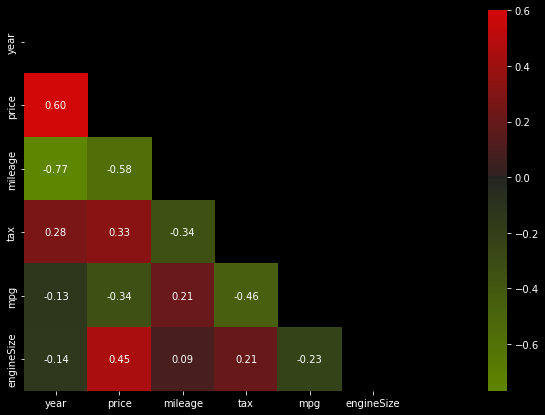

In [18]:
# Creamos una mascara para poder doblar el heatmap
my_mask = np.triu(np.ones_like(correlation_classa, dtype = bool))

# Creo mi propia paleta de colores para el heatmap
my_cmap = sns.diverging_palette(100, 20, s = 200, l = 50, n = 5, 
                                center = 'dark', 
                                as_cmap = True)
plt.figure(figsize = (30, 7))

sns.heatmap(correlation_models_ace, mask = my_mask,  
            cmap = my_cmap, center = 0, fmt = '.2f', 
            annot = True, square = True)

plt.show()

Lo siquiente que voy a mostrar es una matriz de gráficos de dispersión, para ver de forma grafica mas correlaciones y poder así extraer gráficas que nos sean útiles.

In [19]:
from pandas.plotting import scatter_matrix

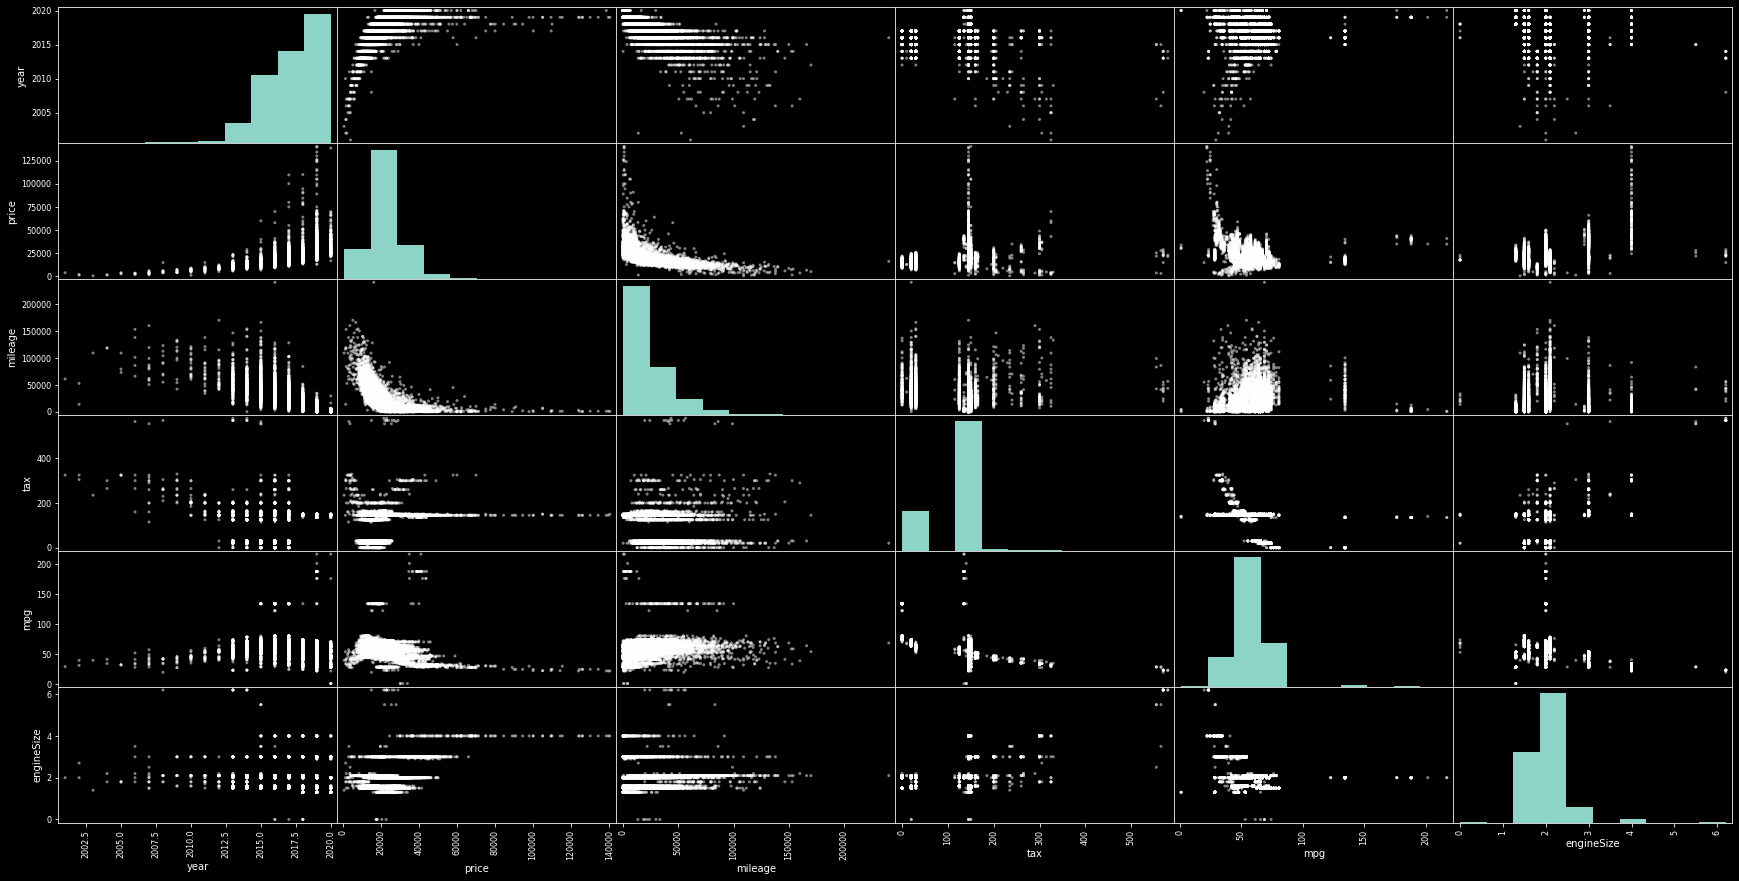

In [20]:
attributes = ['year', 'price', 
              'mileage', 'fuelType', 
              'tax', 'mpg', 'engineSize', 'transmission']

scatter_matrix(mercedes_models_ace[attributes], 
               figsize = (30, 15),
               color = 'white')

plt.show()

! Sacar 2 graficas mas

1. engineSize vs mileage
2. mileage vs year

### Correlación visual entre 'Mileage'(Millas) y 'Price'(Precio).

Con esta grafica lo que podemos ver, que contra menos kilometros tenga un vehículo su precio es mas alto. 

Es decir, dichas variables son inversamente proporcionales. Puesto que si sube una baja la otra.

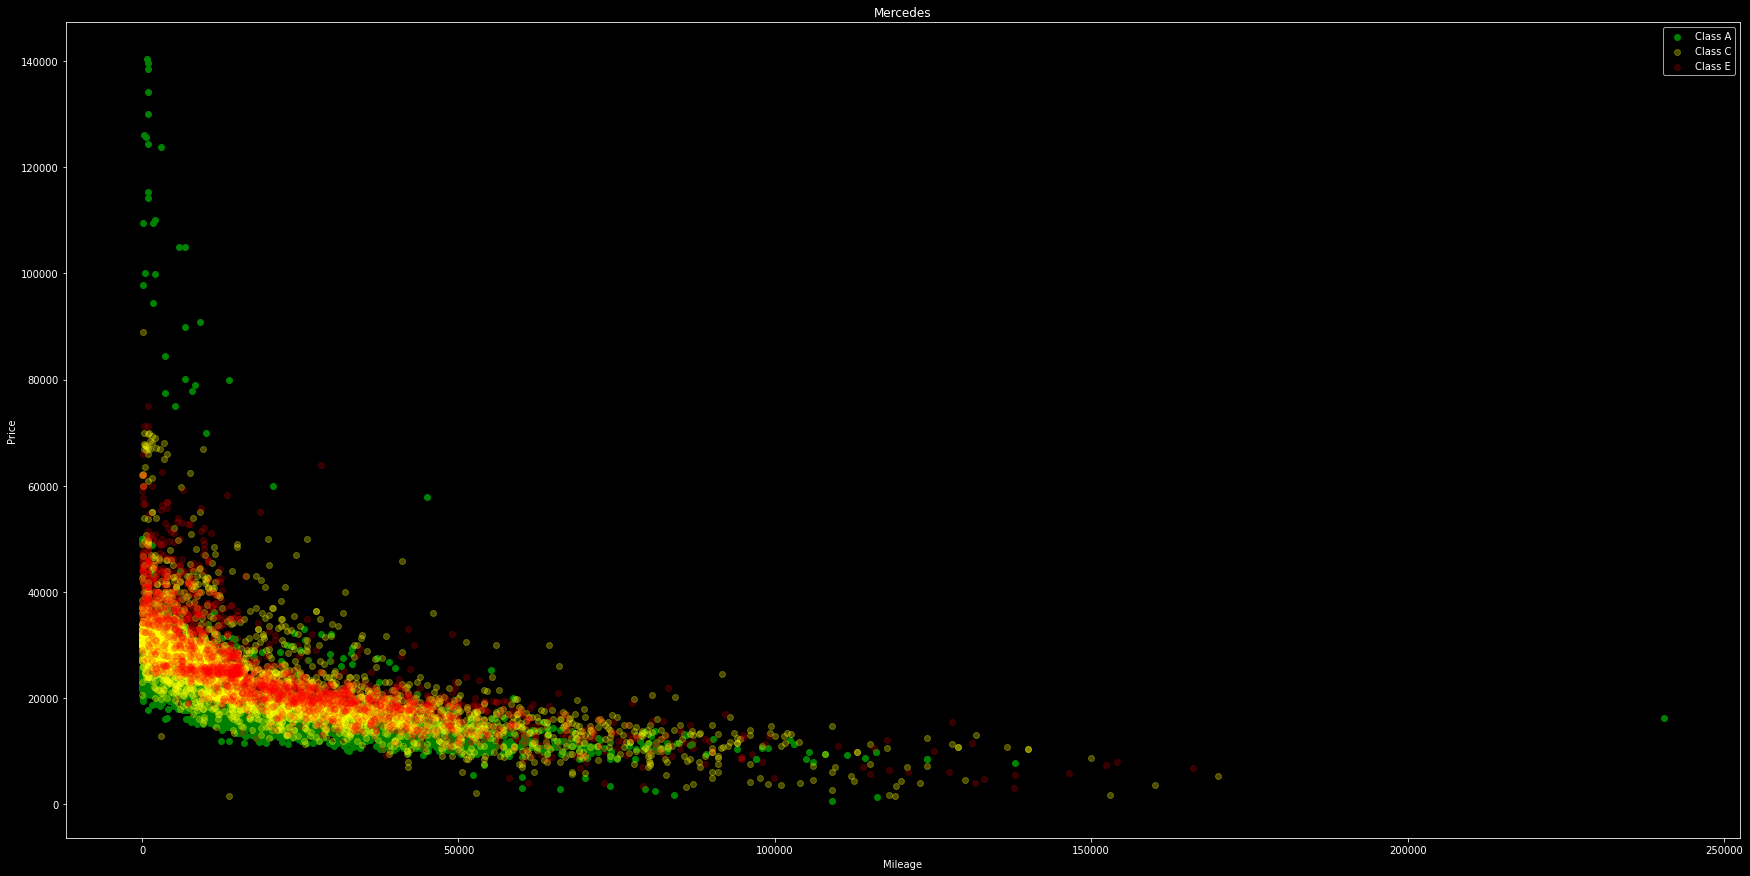

In [21]:
# vamos a sacar una grafica entre millas y precio
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x = 'mileage', y = 'price', data = mercedes_classa, 
           c = 'green')
ax.scatter(x = 'mileage', y = 'price', data = mercedes_classc,
           c = 'yellow',
           alpha = 0.3)
ax.scatter(x = 'mileage', y = 'price', data = mercedes_classe, 
           c = 'red',
           alpha = 0.2)

ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
ax.set_title('Mercedes')
ax.legend(['Class A', 'Class C', 'Class E'])

plt.show()

### Correlación visual entre 'year'(Años) y 'Price'(Precio).

Con esta grafica lo que podemos ver, que contra mas años tenga un vehículo su precio es mas alto. 

Estas variables son propocionales entre si, puesto que contra menos años mayor será el precio.

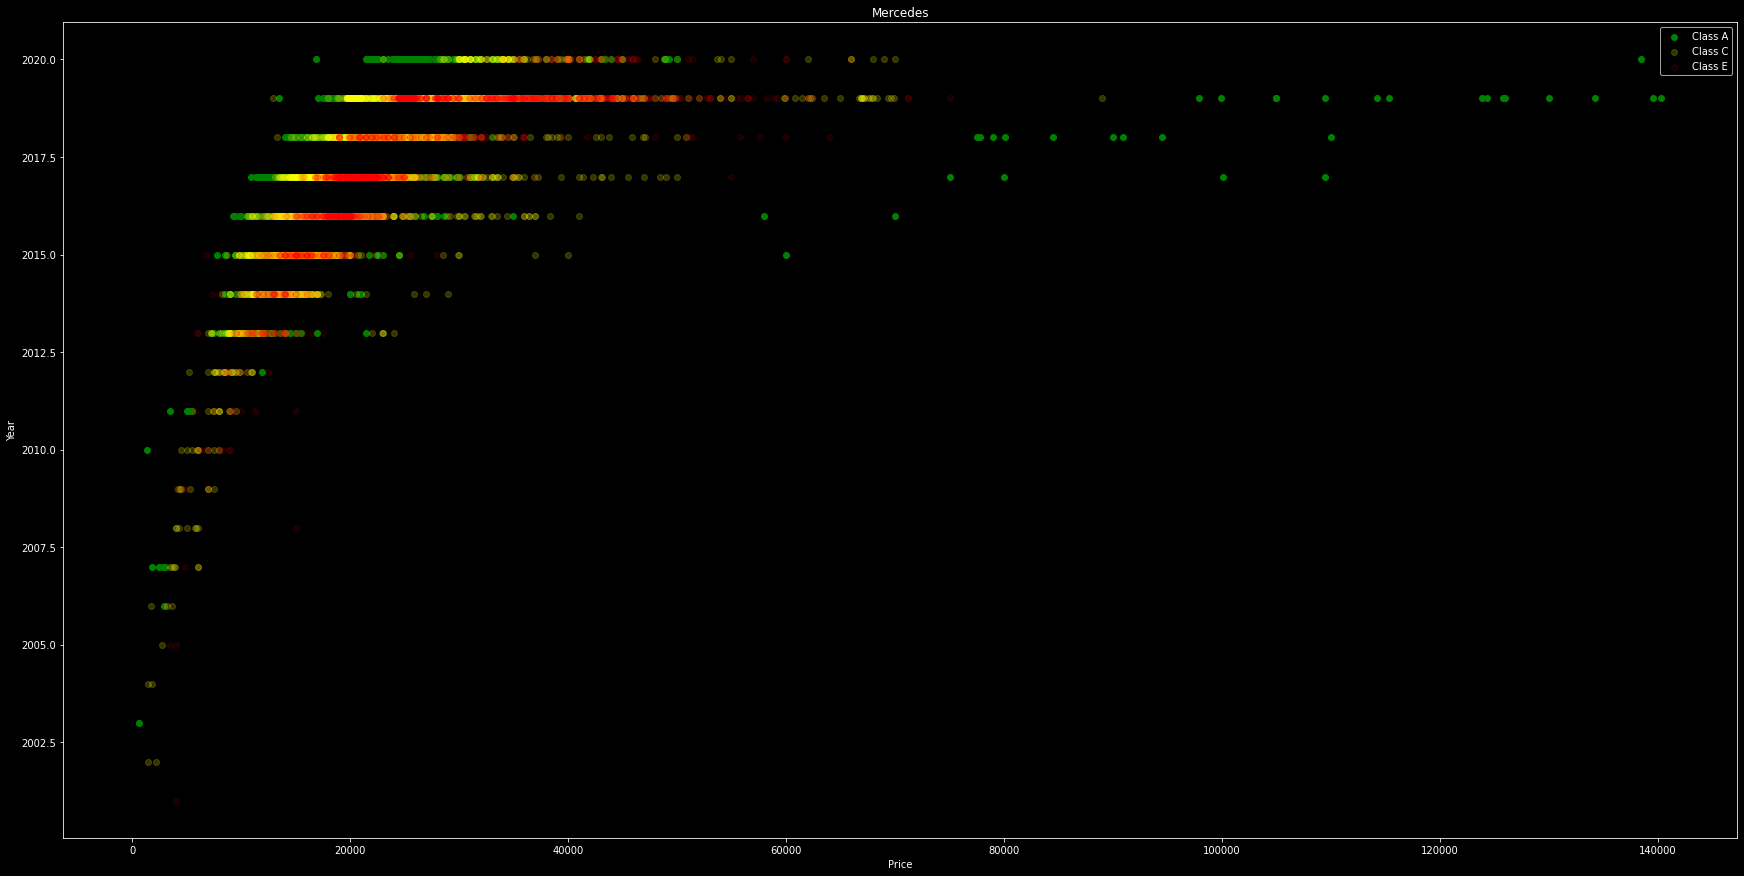

In [22]:
# vamos a sacar una grafica entre millas y años
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x = 'price', y = 'year', data = mercedes_classa,
           c = 'green')
ax.scatter(x = 'price', y = 'year', data = mercedes_classc, 
           c = 'yellow',
           alpha = 0.2)
ax.scatter(x = 'price', y = 'year', data = mercedes_classe, 
           c = 'red', 
           alpha = 0.1)

ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_title('Mercedes')
ax.legend(['Class A', 'Class C', 'Class E'])

plt.show()

Ahora con la siguiente grafica voy a representar cuales son las taxas que mas se pagan para estos modelos en UK

### Correlación visual entre 'tax'(Tasas) y 'Price'(Precio).

Con esta grafica lo que podemos ver que la media de precio de impuestos para las 3 clases suele ser de 150 libras.

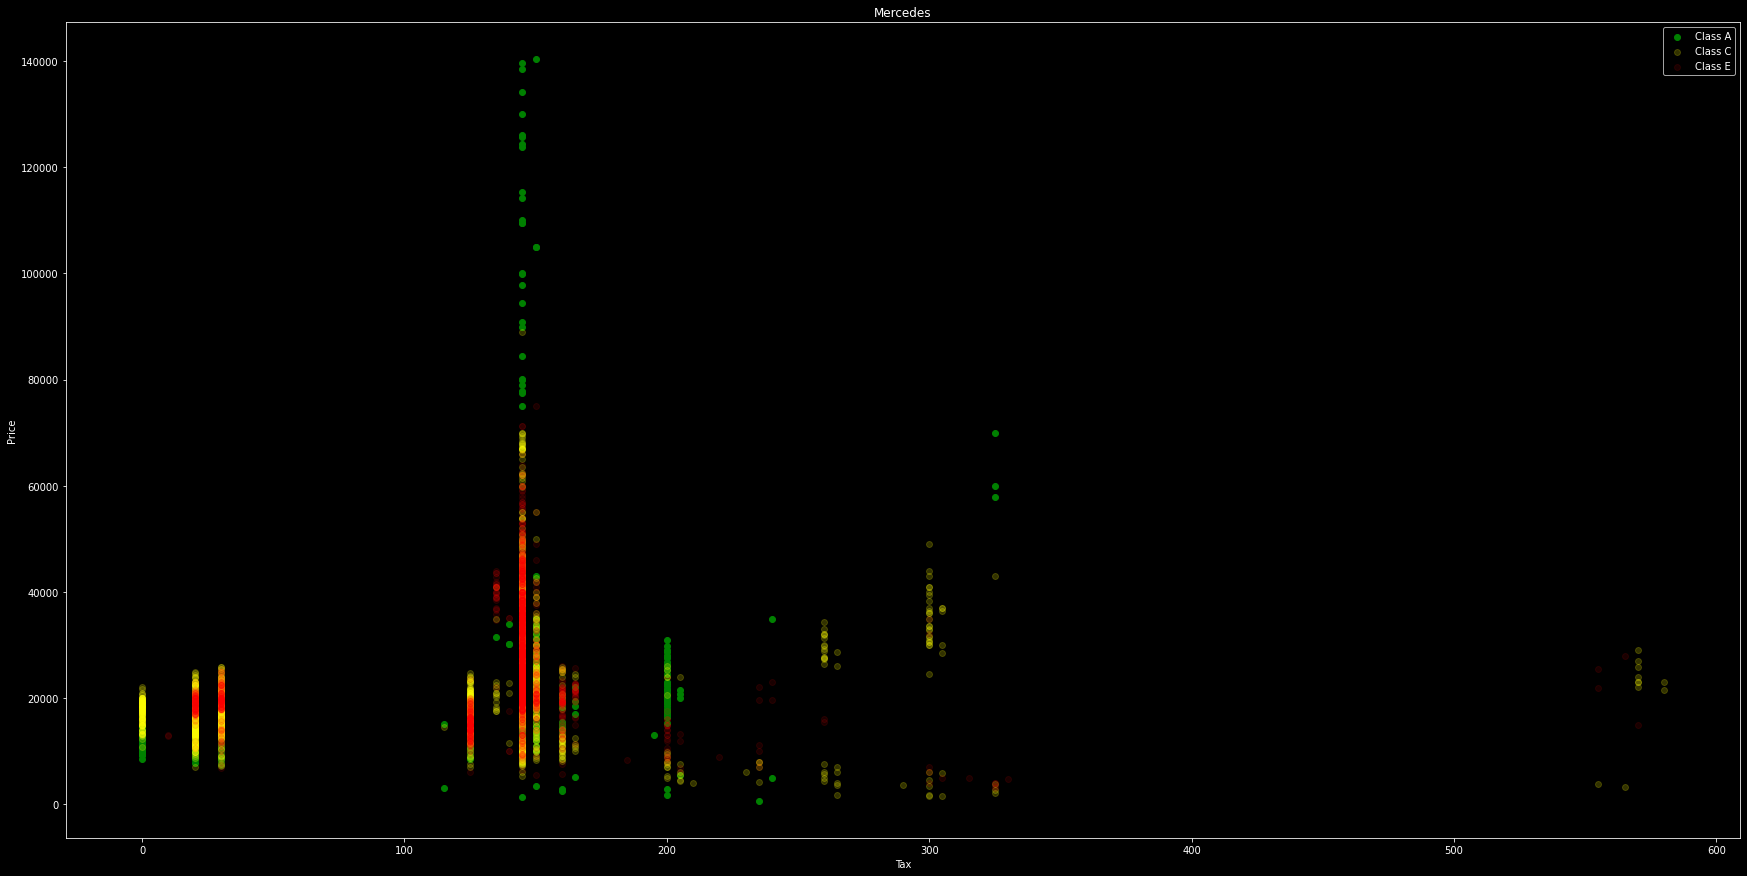

In [23]:
# vamos a sacar una grafica entre tax y precio
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x = 'tax', 
           y = 'price', 
           data = mercedes_classa, 
           c = 'green')

ax.scatter(x = 'tax', 
           y = 'price', 
           data = mercedes_classc, 
           c = 'yellow', alpha = 0.2)

ax.scatter(x = 'tax', 
           y = 'price', data = mercedes_classe, 
           c = 'red', alpha = 0.1)

ax.set_xlabel('Tax')
ax.set_ylabel('Price')
ax.set_title('Mercedes')
ax.legend(['Class A', 'Class C', 'Class E'])

plt.show()

### Correlación visual entre 'engineSize'(Tamaño de motor) y 'mileage'(Millas).


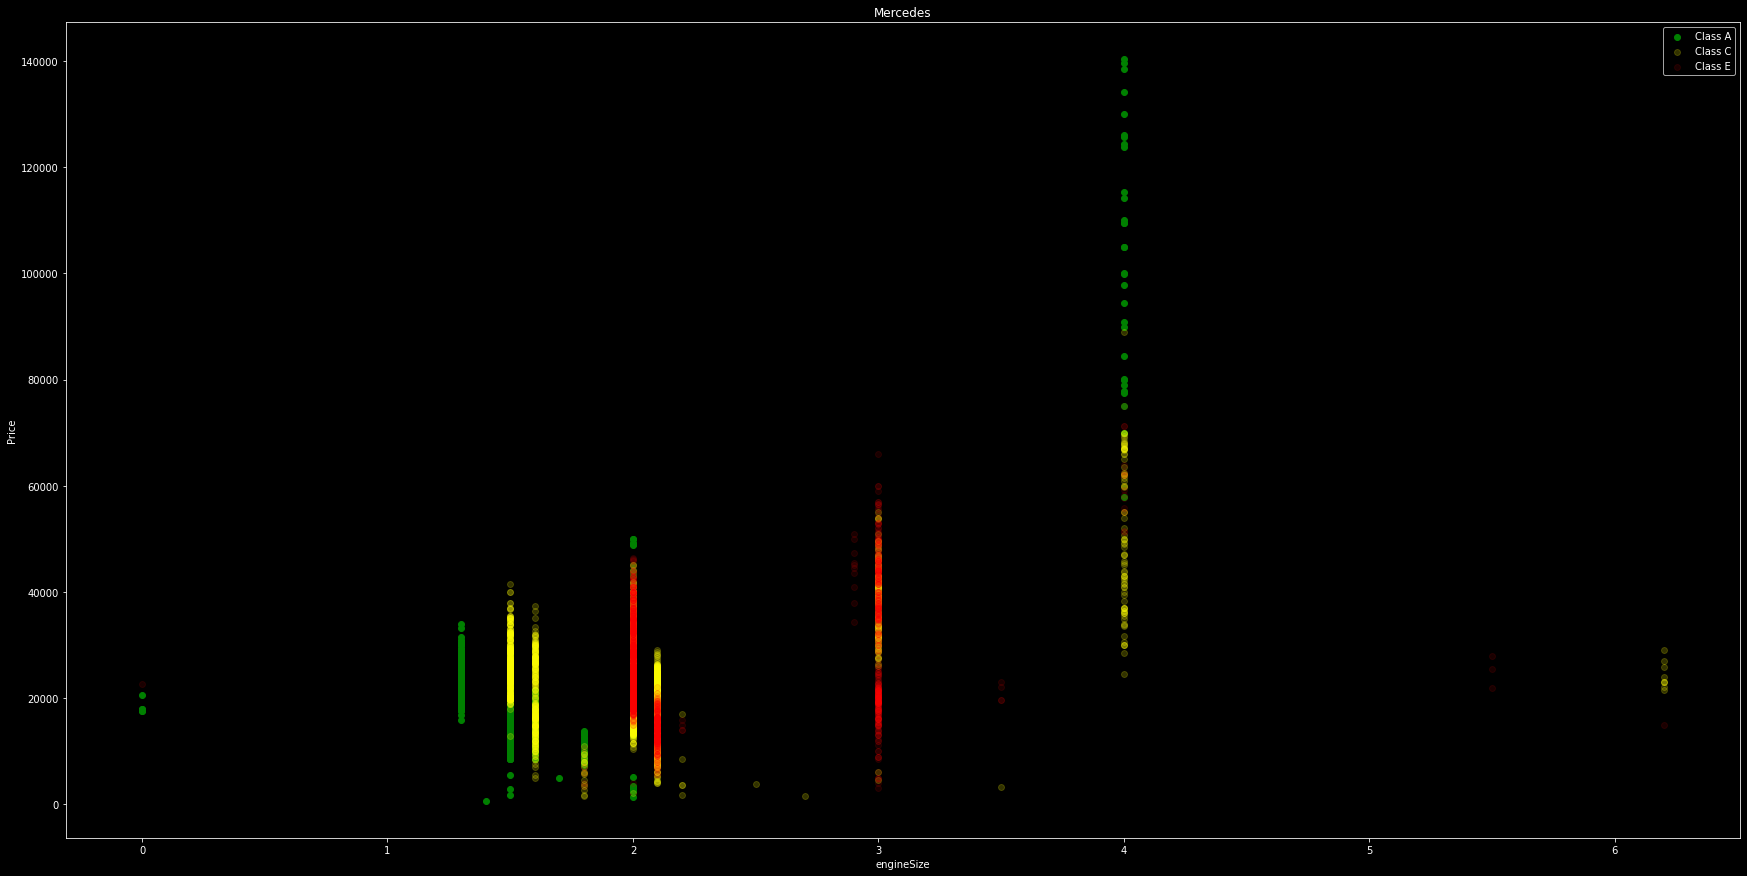

In [24]:
# vamos a sacar una grafica entre el tamaño de motor y millas
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x = 'engineSize', 
           y = 'price', 
           data = mercedes_classa, 
           c = 'green')

ax.scatter(x = 'engineSize', 
           y = 'price', 
           data = mercedes_classc, 
           c = 'yellow', alpha = 0.2)

ax.scatter(x = 'engineSize', 
           y = 'price', data = mercedes_classe, 
           c = 'red', alpha = 0.1)

ax.set_xlabel('engineSize')
ax.set_ylabel('Price')
ax.set_title('Mercedes')
ax.legend(['Class A', 'Class C', 'Class E'])

plt.show()

### Correlación visual entre 'mileage'(Millas) y 'year'(Años).

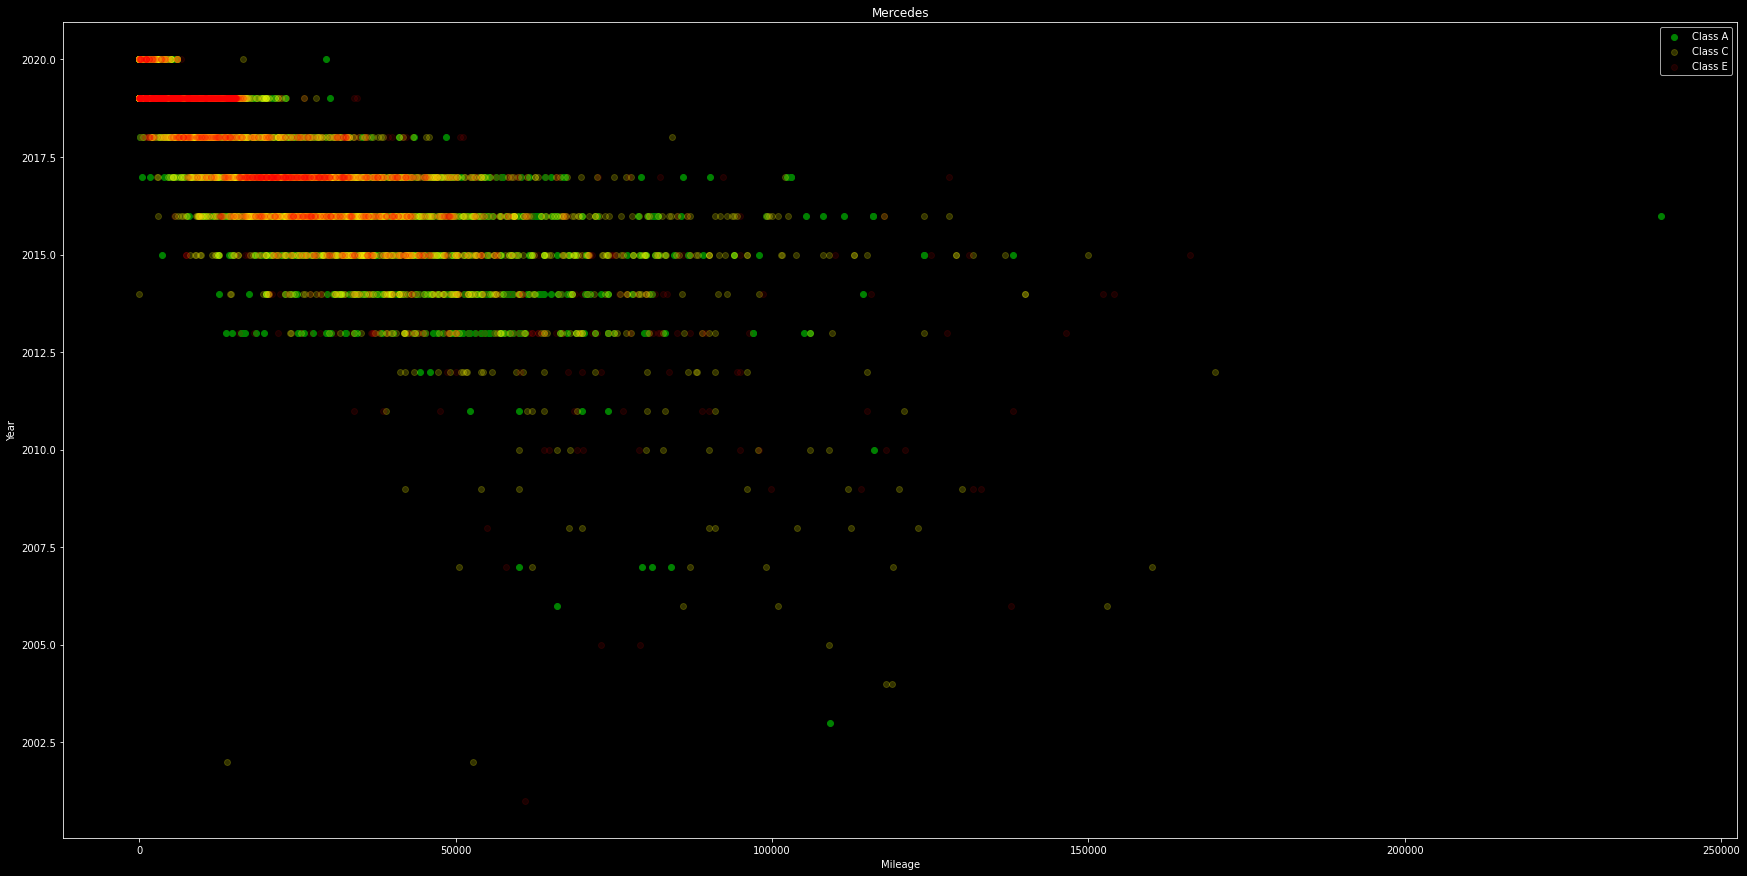

In [25]:
# vamos a sacar una grafica entre millas y años
fig, ax = plt.subplots(figsize = (30, 15))

ax.scatter(x = 'mileage', 
           y = 'year', 
           data = mercedes_classa, 
           c = 'green')

ax.scatter(x = 'mileage', 
           y = 'year', 
           data = mercedes_classc, 
           c = 'yellow', alpha = 0.2)

ax.scatter(x = 'mileage', 
           y = 'year', data = mercedes_classe, 
           c = 'red', alpha = 0.1)

ax.set_xlabel('Mileage')
ax.set_ylabel('Year')
ax.set_title('Mercedes')
ax.legend(['Class A', 'Class C', 'Class E'])

plt.show()

### Correlación visual usando una Grafica con predicción
Ahora usando Seaborn, voy a genear una grafica como las anteriores, pero en este caso lleva integrada la proyección que tienen los datos.

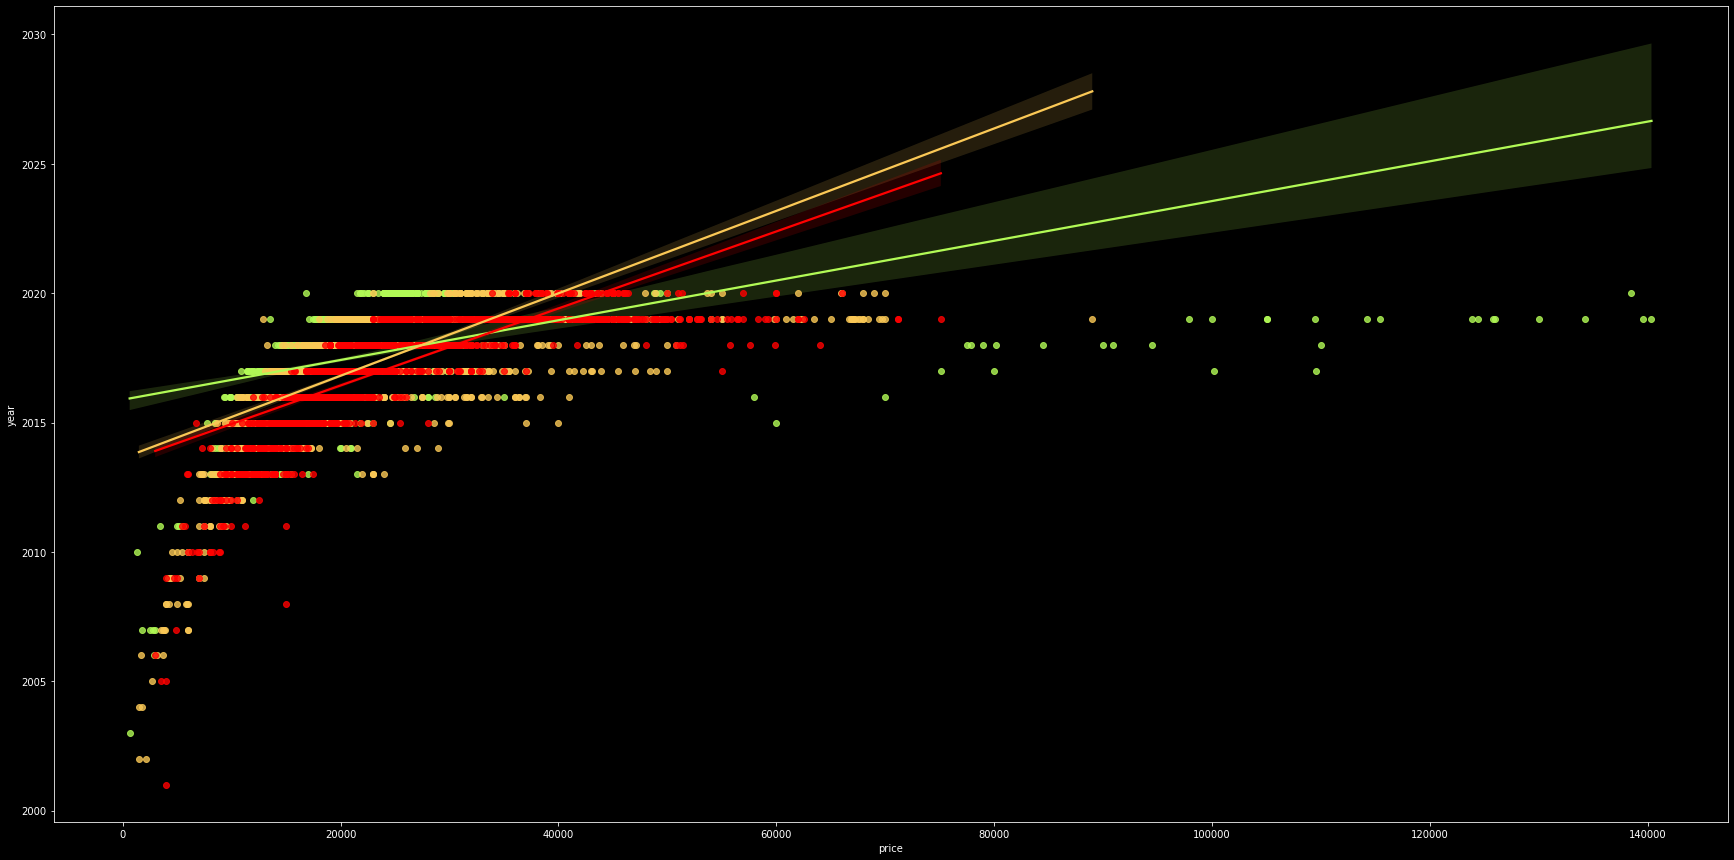

In [26]:
# Con la siguiente grafica vemos las predicciones
plt.figure(figsize = (30, 15))

sns.regplot(x="price", y="year", data=mercedes_classa, color = '#B2FA56')
sns.regplot(x="price", y="year", data=mercedes_classc, color = '#FAC856')
sns.regplot(x="price", y="year", data=mercedes_classe, color = '#FF0000')

plt.show()

## 4. Exposición del objetivo



En relación a los datos observados en las graficas anteriores y las correlaciones obtenidas, he decidido lo siquiente:

1. Voy a cambiar los datos de Class A, Class C y Class E a numeros, para que le resulte al modelo mas facil el trabajo con los datos, la conversión será la siguiente:

  - Class A -> 0 
  - Class C -> 1
  - Class E -> 2

2. Cambiare tambien los valores combustible de la siguiente manera:

  - Petrol -> 0
  - Diesel -> 1
  - Hybrid -> 2

3. Por último haré una conversión de los nombres de la caja de cambios de la siguiente forma:

  - Manual -> 0
  - Automatic -> 1
  - Semi-Auto -> 2

El objetivo del modelo es que sea capaz de predecir el valor(precio) mas optimo para la venta de los siguientes coches que tengo en el concesionario de 2 mano:

### **Class A**

![Mercedes-class-a](https://drive.google.com/uc?export=view&id=16zJSjcP4jfZzvHjsW1DD2CiBq41_VQd4)

| Datos | Descripción |
| --- | --- |
| Marca | Mercedes |
| Modelo | Clase A |
| Año de registro | 2018 |
| Caja de cambios | Automática |
| Kilometraje (millas) | 74564mi (120000 km) |
| Combustible | Gasolina |
| Impuesto £ (libras) | 150 |
| Consumo (millas) | 6.0 |
| Tamaño motor (litros) | 1.2 |

### Class C

![Mercedes-class-c](https://drive.google.com/uc?export=view&id=1fascChWOehLR3HlohAlxeLjHs8GJsM7p)

| Datos | Descripción |
| --- | --- |
| Marca | Mercedes |
| Modelo | Clase C |
| Año de registro | 2018 |
| Caja de cambios | Automática |
| Kilometraje (millas) | 71457.69 mi(115000km) |
| Combustible | Diesel |
| Impuesto £ (libras) | 200 |
| Consumo (millas) | 5.3 |
| Tamaño motor (litros) | 1.2 |

### Class E

![Mercedes-class-e](https://drive.google.com/uc?export=view&id=1lQCtsJvD0QKPWqUkam_KvoKih3ufqP1m)

| Datos | Descripción |
| --- | --- |
| Marca | Mercedes |
| Modelo | Clase E |
| Año de registro | 2015 |
| Caja de cambios | Automática |
| Kilometraje (millas) | 66486mi (107000km) |
| Combustible | Diesel |
| Impuesto £ (libras) | 250 |
| Consumo (millas) | 7.9 |
| Tamaño motor (litros) | 2.2 |

## 5. Preparación de los datos para los algoritmos de Machine Learning

En mi caso no tenemos ningún nulo, como podemos ver en la siguiente tabla.

In [27]:
mercedes_models_ace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8261 entries, 10 to 13114
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8261 non-null   object 
 1   year          8261 non-null   int64  
 2   price         8261 non-null   int64  
 3   transmission  8261 non-null   object 
 4   mileage       8261 non-null   int64  
 5   fuelType      8261 non-null   object 
 6   tax           8261 non-null   int64  
 7   mpg           8261 non-null   float64
 8   engineSize    8261 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 645.4+ KB


A continuación voy a transformar los datos de las columnas de **model**, **transmission** y **fuelType**, donde primeros veremos que tipos tenemos.

In [28]:
mercedes_models_ace['model'].unique()

array(['A Class', 'C Class', 'E Class'], dtype=object)

In [29]:
mercedes_models_ace['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [30]:
mercedes_models_ace['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

Ahora voy a cambiar los valores de dichas columnas, creando una nueva variable llamada `mercedes_models_ace_prep`

In [31]:
"""

  Los cambios en estas variables se deben de hacer cuando hay una 
  clasificacion de valores, por ejemplo el estado del vehículos.

  Pero en mi caso lo quiero hacer para que no me de conflictos sklearn cuando
  pase los parametros.

"""

# Modelo, Combustible y Caja de cambios
mercedes_models_ace_prep = mercedes_models_ace.replace({'A Class': 0, 
                             'C Class': 1,
                             'E Class': 2,
                             'Petrol': 0,
                             'Diesel': 1,
                             'Hybrid': 2,
                             'Other': 3,
                             'Manual': 0, 
                             'Automatic': 1,
                             'Semi-Auto': 2})

mercedes_models_ace_prep.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10,0,2020,32980,1,606,0,145,35.8,2.0
11,0,2020,26980,1,1000,1,145,62.8,1.5
16,1,2017,19890,1,30281,1,150,60.1,2.1
19,1,2014,15701,1,20498,1,20,64.2,2.1
20,1,2019,26601,1,9949,1,150,64.2,2.0


## 6. Entrenamieto del modelo

En primer lugar vamos a separar en la variable $y$ el precio de los vehiculos, 
   que es el valor que queremos predecir (output).

In [32]:
y = mercedes_models_ace_prep['price']
y

10       32980
11       26980
16       19890
19       15701
20       26601
         ...  
13107    24999
13109    16499
13112    30399
13113    30999
13114    35999
Name: price, Length: 8261, dtype: int64

Ahora separamos en $X$ el resto de datos que serán los valores de entrada (imputs)

In [33]:
X = mercedes_models_ace_prep.drop(['price'], axis = 1)

X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
10,0,2020,1,606,0,145,35.8,2.0
11,0,2020,1,1000,1,145,62.8,1.5
16,1,2017,1,30281,1,150,60.1,2.1
19,1,2014,1,20498,1,20,64.2,2.1
20,1,2019,1,9949,1,150,64.2,2.0
...,...,...,...,...,...,...,...,...
13107,1,2019,1,6064,1,145,61.4,2.0
13109,0,2017,1,20477,1,145,68.9,2.1
13112,1,2019,1,5000,1,145,61.4,2.0
13113,1,2020,1,1000,1,145,64.2,2.0


### Preparación de los datos para el modelo

In [34]:
# Separamos los datos de entrenamiento y de test

# Importamos de la libreria sklearn el metodo para separar los datos

from sklearn.model_selection import train_test_split as tts

# Ahora repartimos en las diferentes variables los datos

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20)

In [35]:
# Mostramos los datos de entrenamiento

X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
11161,1,2016,0,100950,1,20,65.7,2.1
4742,1,2016,0,11972,1,30,65.7,1.6
1664,0,2014,0,45000,1,30,64.2,2.1
2581,1,2017,1,25003,0,165,44.1,2.0
11259,0,2016,0,43132,1,20,68.9,1.5
...,...,...,...,...,...,...,...,...
8639,2,2019,2,7220,2,135,188.3,2.0
10631,0,2019,1,11363,1,145,68.9,1.5
5262,1,2018,2,10179,1,145,54.3,2.0
8085,2,2018,2,4992,1,145,57.7,2.0


In [36]:
# Mostramos los datos de test

X_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
11904,2,2015,1,56101,1,125,58.9,2.1
8408,2,2018,2,20457,1,145,65.7,2.0
10327,0,2017,0,55094,1,145,68.9,1.5
2133,1,2020,2,3953,0,145,42.2,2.0
10477,2,2015,1,81720,1,125,60.1,2.1
...,...,...,...,...,...,...,...,...
12478,2,2014,1,44488,1,145,58.9,2.1
3374,0,2017,2,15734,1,145,68.9,2.1
8711,2,2019,1,4578,1,145,57.7,2.0
11416,0,2016,0,35699,1,20,72.4,1.5


In [37]:
# Mostramos los datos de salida de entrenamiento

y_train

11161    11000
4742     16020
1664     10765
2581     24481
11259    14459
         ...  
8639     41399
10631    18748
5262     27950
8085     29499
395      24998
Name: price, Length: 6608, dtype: int64

In [38]:
# Mostramos los datos de salida de test

y_test

11904    14250
8408     22049
10327    14486
2133     36990
10477    12295
         ...  
12478    13100
3374     18495
8711     38509
11416    12799
12275    15900
Name: price, Length: 1653, dtype: int64

### Ahora vamos a entrenar el modelo para predecir el precio de los 3 Mercedes que queremos vender con diferentes algoritmos:

1. Regresión Lineal
2. Lasso
3. Regresión Ridge
4. Árbol de decisión
5. Random Forest
6. Gradient Boosting Regression

### Algoritmos de Regresion Lineal

#### Algoritmo Regresión Lineal

In [39]:
# Importamos el algoritmo de Regresión Linear de SKLearn.
from sklearn.linear_model import LinearRegression 

# Ahora instaciamos la clase 

mercedes_models_lr = LinearRegression()

# Entrenamiento del modelo

"""
  A la hora de entrenar el modelo, donde en vez de pasarle el Dataframe como tal
  le vamos a pasar los valores en forma de array, para ello usamos .values.

  Esto le facilitara el procesamiento al algoritmo y nos protegeremos de 
  posibles fallos.
  
  ---

  Le pasaremos al metodo .fit los array de entrada (X_train.values) 
  y salida (y_train.values)

"""
mercedes_models_lr.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


Ahora voy a visualizar resultados tando del comiendo del entranamiento como del final del entrenamiento, para ver las diferencias entre precios.

Haremos los siguientes pasos:

1. Pasaremos al metodo `.predict` nuestra variable `X_test`, instanciandolo en una nueva variable `y_pred` donde se recogeran los precios predichos por el modelo.

2. Realizaremos un bucle entre los arrays de `y_pred` y `y_test`, sacandolos uno al lado del otro con un print para poder comparar los valores

3. Añadiremos una tercera columna con error absoluto, el cual nos dira la diferencia entre el valor de `y_pred_lr` y `y_test_array_lr`, donde si el valor es menor podemos decir que el modelo a predecido con mayor efectividad.

4. Este proceso lo hare en el resto de modelos, pero cambiando las variables de nombre para identificarlos mejor

In [40]:
# Predicción

y_pred_lr = mercedes_models_lr.predict(X_test.values)

y_test_array_lr = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_test_array_lr[price]
  estim_price = y_pred_lr[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
14250.00     13934.37           315.63
22049.00     24268.43          2219.43
14486.00     11037.43          3448.57
36990.00     34191.12          2798.88
12295.00     11173.81          1121.19
22399.00     21462.20           936.80
9124.00      5267.74          3856.26
23490.00     24086.11           596.11
15700.00     17167.85          1467.85
31609.00     28739.01          2869.99


Lo siguiente que vamos a sacar es información acerca de los coeficientes, el error cuadrático medio y coeficiente de determinación(tasa de acierto)

In [41]:
# Coeficientes
print("Coeficientes: \n", mercedes_models_lr.coef_)

# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_lr, y_pred_lr, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_lr, y_pred_lr))

Coeficientes: 
 [ 2.18812950e+02  2.57887781e+03  3.82734969e+02 -1.06645474e-01
 -2.66727653e+03 -1.44854960e+01 -2.36762991e+01  1.13587666e+04]
Error cuadrático medio: 5010.14
Coeficiente de determinación: 0.70


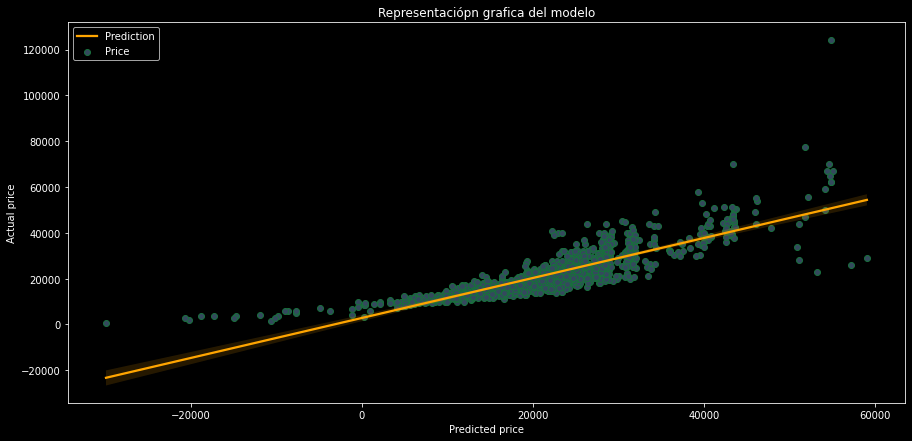

In [42]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_pred_lr,
            y = y_test_array_lr,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

Predicción de los 3 coches del concesionario con el algoritmo de Regresión Lineal.

In [43]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_lr.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 17999.0 £


In [44]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_lr.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 22591.0 £


In [45]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_lr.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 46968.0 £


#### Algoritmo Lasso

In [46]:
# Importamos el algoritmo de Random Forest de SKLearn
from sklearn.linear_model import Lasso

mercedes_models_ls = Lasso()

# Entrenamiento del modelo
mercedes_models_ls.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [47]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_ls = mercedes_models_ls.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_ls = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_ls[price]
  estim_price = y_test_array_ls[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
13936.02     14250.00           313.98
24267.46     22049.00          2218.46
11043.67     14486.00          3442.33
34184.94     36990.00          2805.06
11173.36     12295.00          1121.64
21463.87     22399.00           935.13
5274.17      9124.00          3849.83
24083.75     23490.00           593.75
17169.22     15700.00          1469.22
28740.56     31609.00          2868.44


In [48]:
# Coeficientes
print("Coeficientes: \n", mercedes_models_ls.coef_)

# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_ls, y_pred_ls, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_ls, y_pred_ls))

Coeficientes: 
 [ 2.17290330e+02  2.57809875e+03  3.80971057e+02 -1.06713295e-01
 -2.65382908e+03 -1.44601940e+01 -2.39806923e+01  1.13524013e+04]
Error cuadrático medio: 5009.50
Coeficiente de determinación: 0.70


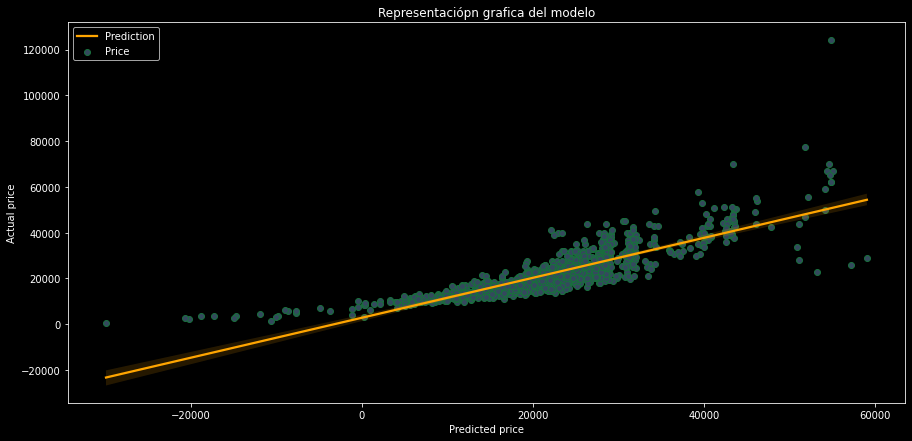

In [49]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_pred_ls,
            y = y_test_array_ls,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

In [50]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_ls.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 18025.0 £


In [51]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_ls.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 22610.0 £


In [52]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_ls.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 46961.0 £


#### Algoritmo Ridge regression

In [53]:
# Importamos el algoritmo de Random Forest de SKLearn
from sklearn.linear_model import Ridge

mercedes_models_rg = Ridge()

# Entrenamiento del modelo
mercedes_models_rg.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [54]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_rg = mercedes_models_rg.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_rg = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_rg[price]
  estim_price = y_test_array_rg[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
13938.06     14250.00           311.94
24270.84     22049.00          2221.84
11039.95     14486.00          3446.05
34188.34     36990.00          2801.66
11176.51     12295.00          1118.49
21465.23     22399.00           933.77
5272.41      9124.00          3851.59
24088.18     23490.00           598.18
17168.04     15700.00          1468.04
28739.56     31609.00          2869.44


In [55]:
# Coeficientes
print("Coeficientes: \n", mercedes_models_rg.coef_)

# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_rg, y_pred_rg, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_rg, y_pred_rg))

Coeficientes: 
 [ 2.20815617e+02  2.57813017e+03  3.82897730e+02 -1.06673360e-01
 -2.65965946e+03 -1.44699737e+01 -2.39091241e+01  1.13479516e+04]
Error cuadrático medio: 5009.13
Coeficiente de determinación: 0.70


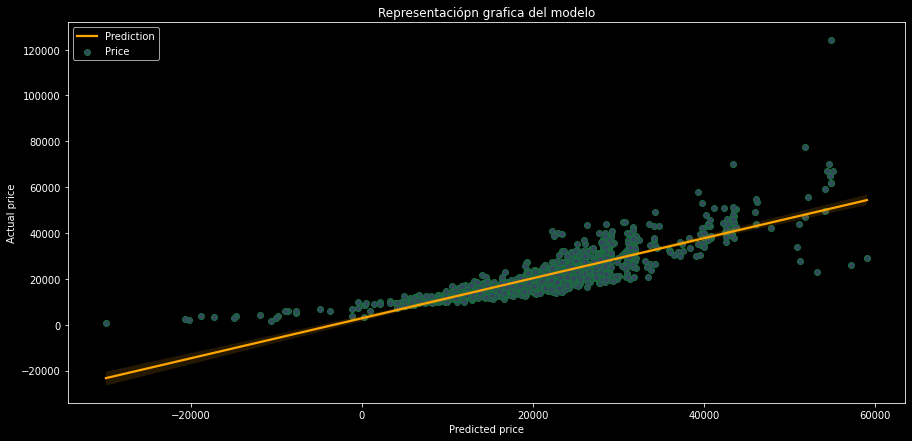

In [56]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_pred_rg,
            y = y_test_array_rg,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

In [57]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_rg.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 18017.0 £


In [58]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_rg.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 22605.0 £


In [59]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_rg.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 46946.0 £


### Algoritmos de Arboles de Decisión

#### Arbol de decisión

Realizamos el mismo proceso que con el algoritmo de Regresión Lineal, pero en este caso con el algoritmo de Arbol de decisión

In [60]:
# Importamos el algoritmo de arbol de decisión de SKLearn
from sklearn.tree import DecisionTreeRegressor

mercedes_models_dtr = DecisionTreeRegressor()

# Entrenamiento del modelo
mercedes_models_dtr.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [61]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_dtr = mercedes_models_dtr.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_dtr = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_dtr[price]
  estim_price = y_test_array_dtr[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
14490.00     14250.00           240.00
22980.00     22049.00           931.00
14000.00     14486.00           486.00
33980.00     36990.00          3010.00
13950.00     12295.00          1655.00
22482.00     22399.00            83.00
8299.00      9124.00           825.00
22980.00     23490.00           510.00
16500.00     15700.00           800.00
32064.00     31609.00           455.00


In [62]:
# Final del entrenamiento

y_pred_dtr_re = y_pred_dtr[::-1]
y_test_array_dtr_re = y_test_array_dtr[::-1]

print("Prec. real  Prec. estimado  Error absoluto")
for i in range(10):
  real_price = y_pred_dtr_re[i]
  estim_price = y_test_array_dtr_re[i]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")


Prec. real  Prec. estimado  Error absoluto
14770.00     15900.00          1130.00
12999.00     12799.00           200.00
39925.00     38509.00          1416.00
17149.00     18495.00          1346.00
12990.00     13100.00           110.00
26899.00     25799.00          1100.00
28500.00     28449.00            51.00
11300.00     13900.00          2600.00
20299.00     20249.00            50.00
14499.00     13995.00           504.00


In [63]:
# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_dtr, y_pred_dtr, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_dtr, y_pred_dtr))

Error cuadrático medio: 2500.45
Coeficiente de determinación: 0.93


Representación grafica de los datos reales y los predecidos

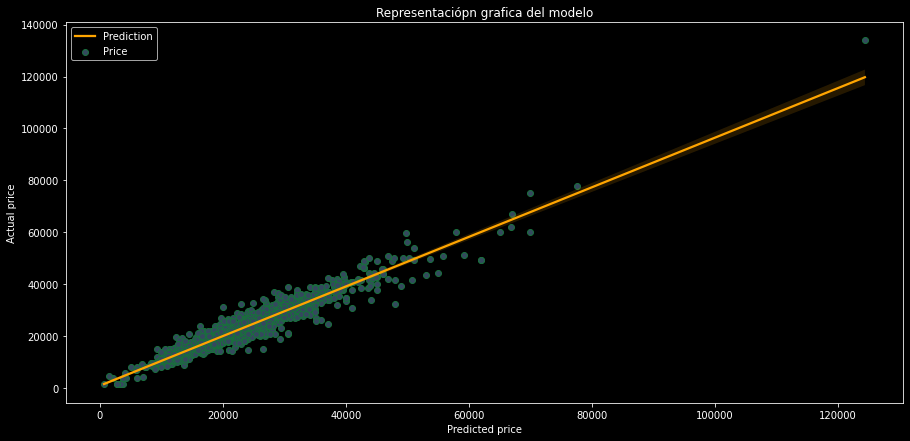

In [64]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_test_array_dtr,
            y = y_pred_dtr,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

Predicción de los 3 coches del concesionario con el algoritmo de Random Forest.

Para el Class A

In [65]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_dtr.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 22480.0 £


Para el Class C


In [66]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_dtr.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 27971.0 £


Para el Class E


In [67]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_dtr.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 21900.0 £


#### Algoritmo Random Forest

Realizamos el mismo proceso que con el algoritmo de Regresión Lineal, pero en este caso con el algoritmo de Random Forest

In [68]:
# Importamos el algoritmo de Random Forest de SKLearn
from sklearn.ensemble import RandomForestRegressor

mercedes_models_rf = RandomForestRegressor()

# Entrenamiento del modelo
mercedes_models_rf.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [69]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_rf = mercedes_models_rf.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_rf = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_rf[price]
  estim_price = y_test_array_rf[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
14432.11     14250.00           182.11
22763.54     22049.00           714.54
13856.15     14486.00           629.85
36683.19     36990.00           306.81
12722.86     12295.00           427.86
21945.34     22399.00           453.66
8530.81      9124.00           593.19
24105.68     23490.00           615.68
16427.47     15700.00           727.47
32083.36     31609.00           474.36


In [70]:
# Final del entrenamiento

y_pred_rf_re = y_pred_rf[::-1]
y_test_array_rf_re = y_test_array_rf[::-1]

print("Prec. real  Prec. estimado  Error absoluto")
for i in range(10):
  real_price = y_pred_rf_re[i]
  estim_price = y_test_array_rf_re[i]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")


Prec. real  Prec. estimado  Error absoluto
17326.25     15900.00          1426.25
13091.44     12799.00           292.44
36348.96     38509.00          2160.04
17747.83     18495.00           747.17
12908.29     13100.00           191.71
26491.29     25799.00           692.29
28633.82     28449.00           184.82
12850.28     13900.00          1049.72
21443.50     20249.00          1194.50
13259.95     13995.00           735.05


In [71]:
# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_rf, y_pred_rf, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_rf, y_pred_rf))

Error cuadrático medio: 2019.56
Coeficiente de determinación: 0.95


Representación grafica de los datos reales y los predecidos

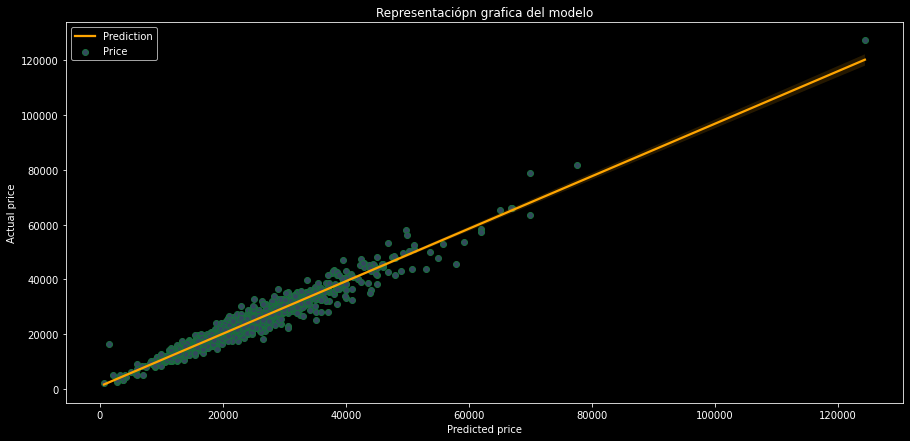

In [72]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_test_array_rf,
            y = y_pred_rf,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

Predicción de los 3 coches del concesionario con el algoritmo de Random Forest.

Para el Class A

In [73]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_rf.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 21129.0 £


Para el Class C


In [74]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_rf.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 27318.0 £


Para el Class E


In [75]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_rf.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 23291.0 £


#### Algoritmo Gradient Boosting Regression

In [76]:
# Importamos el algoritmo de Random Forest de SKLearn
from sklearn.ensemble import GradientBoostingRegressor

mercedes_models_gbr = GradientBoostingRegressor()

# Entrenamiento del modelo
mercedes_models_gbr.fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [77]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_gbr = mercedes_models_gbr.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_gbr = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_gbr[price]
  estim_price = y_test_array_gbr[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
14561.03     14250.00           311.03
22390.66     22049.00           341.66
13848.48     14486.00           637.52
34348.42     36990.00          2641.58
12917.74     12295.00           622.74
21457.25     22399.00           941.75
9422.60      9124.00           298.60
23270.58     23490.00           219.42
15941.84     15700.00           241.84
30819.65     31609.00           789.35


In [78]:
# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_gbr, y_pred_gbr, squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_gbr, y_pred_gbr))

Error cuadrático medio: 2378.62
Coeficiente de determinación: 0.93


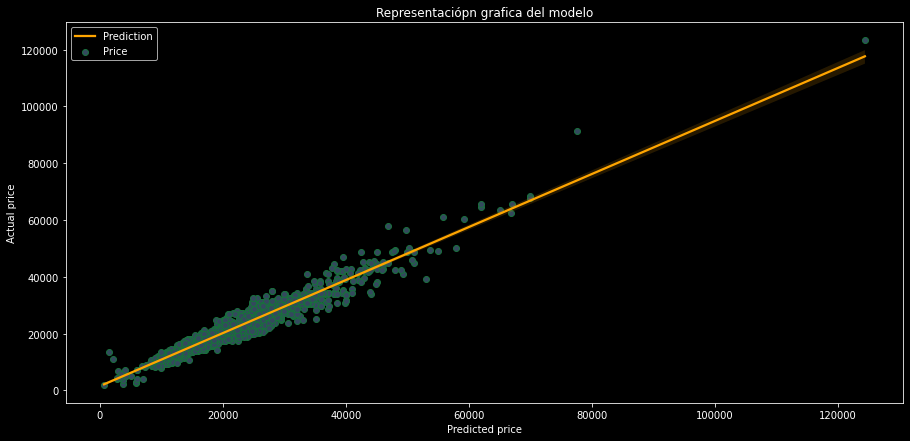

In [79]:
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_test_array_gbr,
            y = y_pred_gbr,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Prediction', 'Price']);

Ahora vemos 

Para el Class A

In [80]:
my_car_a = np.array([[0 ,2018, 1, 29053, 1, 165, 5.0, 1.5]])

print(f"El precio del Mercedes Class A es de {mercedes_models_gbr.predict(my_car_a)[0].round()} £")

El precio del Mercedes Class A es de 20427.0 £


Para el Class C

In [81]:
my_car_c = np.array([[1 ,2018, 1, 40862 , 1, 165, 7.0, 2.0]], dtype = np.float128)

print(f"El precio del Mercedes Class C es de {mercedes_models_gbr.predict(my_car_c)[0].round()} £")

El precio del Mercedes Class C es de 27428.0 £


Para el Class E

In [82]:
my_car_e = np.array([[2,2015, 1, 78259, 0, 615, 7.9, 5.5]], dtype = np.float128)

print(f"El precio del Mercedes Class E es de {mercedes_models_gbr.predict(my_car_e)[0].round()} £")


El precio del Mercedes Class E es de 24219.0 £


## 7. Conclusiones

Ahora vamos a explicar cual de los algoritmos es mas eficiente para nuestro caso.

Primero lo que vamos a realizar es la representación gráfica de los 6 modelos, así podemos determinar de una manera mas visual cual sería el mejor de ellos.

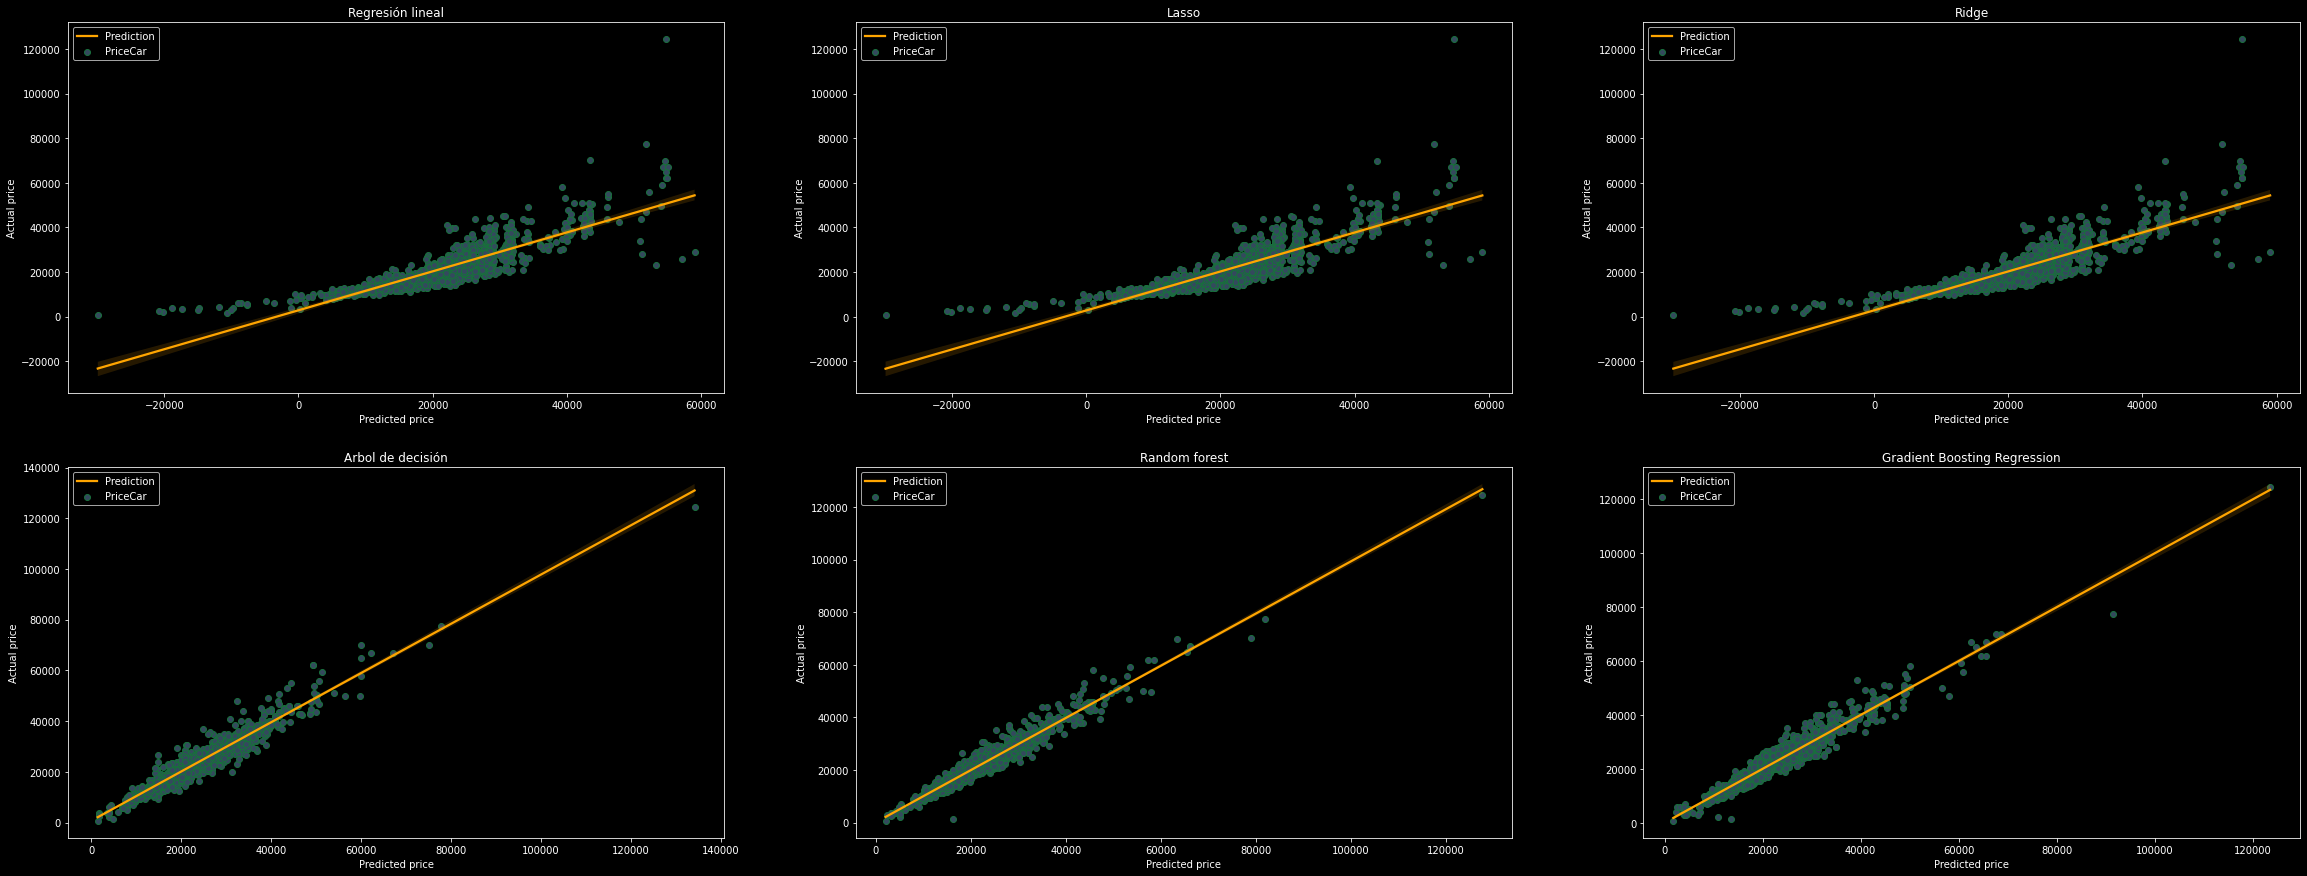

In [83]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (40, 15), nrows = 2, ncols = 3)

"""

  Si quiero pasar parametros adicicionales tengo que usar:

  - scatter_kws -> Para añadir parametros de plt.scatter y plt.plot
  - line_kws -> Lo mismo pero para la linea
  - fit_reg -> Activa la visualización de la linea

"""

# Regresión lineal

ax[0, 0].set_xlabel("Predicted price")
ax[0, 0].set_ylabel("Actual price")
ax[0, 0].set_title("Regresión lineal")

sns.regplot(x = y_pred_lr, y = y_test_array_lr,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[0, 0])

ax[0, 0].legend(['Prediction', 'PriceCar'])

# Lasso

ax[0, 1].set_xlabel("Predicted price")
ax[0, 1].set_ylabel("Actual price")
ax[0, 1].set_title("Lasso");

sns.regplot(x = y_pred_ls, y = y_test_array_ls, 
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[0, 1])

ax[0, 1].legend(['Prediction', 'PriceCar']);

# Ridge 

ax[0, 2].set_xlabel("Predicted price")
ax[0, 2].set_ylabel("Actual price")
ax[0, 2].set_title("Ridge");

sns.regplot(x = y_pred_rg, y = y_test_array_rg, 
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[0, 2])

ax[0, 2].legend(['Prediction', 'PriceCar']);

# Decision Tree

ax[1, 0].set_xlabel("Predicted price")
ax[1, 0].set_ylabel("Actual price")
ax[1, 0].set_title("Arbol de decisión");

sns.regplot(x = y_pred_dtr, y = y_test_array_dtr, 
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[1, 0])

ax[1, 0].legend(['Prediction', 'PriceCar']);

# Random forest

ax[1, 1].set_xlabel("Predicted price")
ax[1, 1].set_ylabel("Actual price")
ax[1, 1].set_title("Random forest");

sns.regplot(x = y_pred_rf, y = y_test_array_rf, 
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[1, 1])

ax[1, 1].legend(['Prediction', 'PriceCar'])

# Gradient Boosting Regression

ax[1, 2].set_xlabel("Predicted price")
ax[1, 2].set_ylabel("Actual price")
ax[1, 2].set_title("Gradient Boosting Regression");

sns.regplot(x = y_pred_gbr, y = y_test_array_gbr, 
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"},
            fit_reg=True,
            ax = ax[1, 2])

ax[1, 2].legend(['Prediction', 'PriceCar']);

| Algoritmo | Coeficiente de determinación |
| --- | --- |
| Regresión Lineal | 0.72 |
| Lasso | 0.73 |
| Ridge | 0.73 |
| Árbol de decisión | 0.90 |
| Random Forest | 0.94 |
| Gradient Boosting Regression | 0.93 |

Como se puede ver los algoritmos basamos en arboles de decisión parecen mas efectivos a la hora de predecir un valor.

Y podemos concluir, que para este caso, el modelo que mas nos conviene usar para predecir el valor de nuestros vehículos Mercedes es el modelo de Random Forest.